In [ ]:
# Regression

In [ ]:
# Algerian Forest Fires Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset=pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [ ]:
# Data cleaning

In [ ]:
# missing values

dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
dataset.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.loc[:122,'Region']=0
dataset.loc[122:,'Region']=1

In [ ]:
dataset['Region']=dataset['Region'].astype(int)

In [ ]:
dataset.isnull().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [ ]:
dataset=dataset.dropna().reset_index(drop=True)

In [ ]:
dataset.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [ ]:
dataset=dataset.drop(122).reset_index(drop=True)

In [ ]:
dataset.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [ ]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
dataset.columns=dataset.columns.str.strip()

In [ ]:
# Change the required columns as integer data typ
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [ ]:
dataset.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0


In [ ]:
dataset[['day','month','year','Temperature','RH','Ws','Region']]=dataset[['day','month','year','Temperature','RH','Ws','Region']].astype(int)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [ ]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
# changing the other columns to float data type
objects=[i for i in dataset.columns if dataset[i].dtype=='O']

In [ ]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [ ]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,1.000000


In [ ]:
for i in objects:
  if i!='Classes':
    dataset[i]=dataset[i].astype(float)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
dataset.to_csv('Algerian_forest_fire_clean_data.csv',index=False)

In [ ]:
#Exploratory data analysis

In [ ]:
# drop day,month and year as it is not needed here
df_copy=dataset.drop(['day','month','year'],axis=1)

In [ ]:
df_copy['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:
# Encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [ ]:
df_copy['Classes']

,Classes
0,0
1,0
2,0
3,0
4,0
...,...
238,1
239,0
240,0
241,0


In [ ]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [ ]:
x=df_copy.drop('FWI',axis=1)

In [ ]:
y=df_copy['FWI']

In [ ]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
x_train.shape,x_test.shape

((162, 11), (81, 11))

In [ ]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653217,-0.294493,-0.306845,0.686784,0.485957,0.387369,0.600649,0.463775,0.515616,0.260966
RH,-0.653217,1.000000,0.200772,0.218350,-0.633803,-0.416955,-0.240523,-0.718725,-0.365222,-0.444497,-0.419498
Ws,-0.294493,0.200772,1.000000,0.247112,-0.178626,0.008702,0.101059,-0.006136,0.043700,-0.062682,-0.216375
Rain,-0.306845,0.218350,0.247112,1.000000,-0.537842,-0.288821,-0.304050,-0.340753,-0.300830,-0.366668,-0.057620
FFMC,0.686784,-0.633803,-0.178626,-0.537842,1.000000,0.624492,0.528396,0.748319,0.611220,0.782922,0.271324
DMC,0.485957,-0.416955,0.008702,-0.288821,0.624492,1.000000,0.869090,0.685568,0.983366,0.617266,0.222615
DC,0.387369,-0.240523,0.101059,-0.304050,0.528396,0.869090,1.000000,0.514349,0.942305,0.547390,-0.046399
ISI,0.600649,-0.718725,-0.006136,-0.340753,0.748319,0.685568,0.514349,1.000000,0.643968,0.733342,0.304554
BUI,0.463775,-0.365222,0.043700,-0.300830,0.611220,0.983366,0.942305,0.643968,1.000000,0.613711,0.127509
Classes,0.515616,-0.444497,-0.062682,-0.366668,0.782922,0.617266,0.547390,0.733342,0.613711,1.000000,0.197291


In [ ]:
#Feature selection
col_corr = set()
corr_matrix = x_train.corr()  # Calculate correlation matrix

for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if abs(corr_matrix.iloc[i, j]) > 0.85:  # Compare values from the matrix
      col_name = corr_matrix.columns[i]  # Get column name
      col_corr.add(col_name)

In [ ]:
corr_matrix.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [ ]:
col_corr

{'BUI', 'DC'}

In [ ]:
x_train.drop(col_corr,axis=1,inplace=True)
x_test.drop(col_corr,axis=1,inplace=True)

In [ ]:
x_train.shape,x_test.shape

((162, 9), (81, 9))

In [ ]:
x_train.shape,x_test.shape

((162, 9), (81, 9))

In [ ]:
# Feature scaling or Standardization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
x_train_scaled.shape

(162, 9)

<Axes: >

<Figure size 1500x500 with 0 Axes>

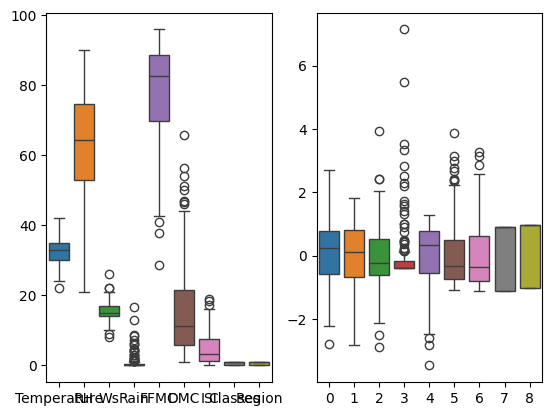

In [ ]:
plt.figure(figsize=(15,5))
axes=plt.subplots(1,2)
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)

In [ ]:
#Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
linear=LinearRegression()
linear.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred=linear.predict(x_test_scaled)

In [ ]:
y_pred

array([ 8.22824619,  7.78215852, -0.25828998,  4.38055759,  6.68222943,
        1.3622597 ,  1.99945794,  7.8355231 ,  1.75018462,  3.38281514,
        0.39430907,  9.77499654,  9.34088351, 17.0031456 , 18.46405093,
        1.27800873,  1.96842081, -0.13276177,  7.16594485,  3.0815781 ,
        1.40741562,  0.18075746,  6.61692105,  0.30350512, 21.01326642,
        5.12525044,  5.95195917,  9.79455912, -0.10781944,  9.74431038,
        6.59526666, -0.41271825, 10.37821088, 14.54681696,  1.534249  ,
        0.44968093,  2.03021843,  6.11533999, -0.58567088, -0.50816843,
        6.70967918,  1.89400102,  8.65548055, -0.39939666, 15.42446579,
        8.30696806,  8.17037058,  1.429858  , 12.91587627,  1.21897904,
       29.50229226,  5.57023   , 17.21300934, 19.44599949, 13.78147012,
       16.16976915,  0.66101829,  8.98278392,  3.59370818, 14.64105141,
        5.14896687,  0.79459158, -0.54252859, 21.87012705,  3.25163001,
        1.75067189,  9.70047411,  6.92953233, 10.47866997, -0.37

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

In [ ]:
mae

0.5767877823415987

In [ ]:
score

0.9845563190792226

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)

Lasso()

In [ ]:
y_pred=lasso.predict(x_test_scaled)

In [ ]:
y_pred

array([ 7.82785008,  7.45116221,  1.03037913,  5.56285756,  7.14442365,
        2.96548846,  3.26415594,  7.87592033,  2.6261094 ,  3.9086518 ,
        1.47325736,  9.92869303,  9.37012939, 15.76543369, 16.32724085,
        2.91741821,  2.54951381, -0.44032911,  7.07787709,  4.03296144,
        2.75544356,  0.79987996,  6.43069087,  0.77064222, 19.20104216,
        5.74493028,  5.8457391 ,  9.15846273, -0.67889936,  9.81767594,
        6.54799804,  1.03575984,  9.61408035, 13.07065854,  2.54611105,
        2.25480225,  2.561897  ,  6.43175948,  0.34157198,  0.36004828,
        6.30709364,  2.90396642,  8.09834843, -0.58347126, 14.48989376,
        7.95251592,  8.54660737,  2.01120749, 12.43656791,  1.85730391,
       25.92710129,  6.05776196, 15.92293699, 17.1625929 , 12.50742658,
       14.39157836,  2.33175404,  9.11308284,  4.65826859, 13.65561031,
        5.82690659,  1.96044688,  0.80257032, 19.91639669,  3.8901755 ,
        2.51722951,  9.0838451 ,  7.34497268, 10.14126905, -0.44

In [ ]:
mae1=mean_absolute_error(y_test,y_pred)
score1=r2_score(y_test,y_pred)

In [ ]:
mae1,score1

(1.1053469612945104, 0.9514102148198663)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)

Ridge()

In [ ]:
y_pred=ridge.predict(x_test_scaled)

In [ ]:
mae2=mean_absolute_error(y_test,y_pred)
score2=r2_score(y_test,y_pred)

In [ ]:
mae2

0.5953582907340912

In [ ]:
score2

0.9839564989246832

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)

ElasticNet()

In [ ]:
y_pred=elastic.predict(x_test_scaled)

In [ ]:
mae3=mean_absolute_error(y_test,y_pred)
r2_score3=r2_score(y_test,y_pred)

In [ ]:
mae3,r2_score3

(1.834545337587552, 0.8825431896054333)

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))